<a href="https://colab.research.google.com/github/shubhankar77/EDA/blob/main/hotal_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import datetime 
import seaborn as sns

1) What type of hotel does a customer book in general?
2) Which year most of customers arrive?
3) Which are the busiest months in the year of hotel booking?
4) How many booking were cancelled.
5) From which country most guests arrive.
6) How customers booked their hotel from market segment.
7) How many customers were stays in week nights and booking changes?
8) How many repeated customers?
9) Deposit type payment of customer?
10) Correlation of Data Set 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv')

In [ ]:
duplicate=df[df.duplicated()]
print(duplicate)

               hotel  is_canceled  lead_time  arrival_date_year  \
5       Resort Hotel            0         14               2015   
22      Resort Hotel            0         72               2015   
43      Resort Hotel            0         70               2015   
138     Resort Hotel            1          5               2015   
200     Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119349    City Hotel            0        186               2017   
119352    City Hotel            0         63               2017   
119353    City Hotel            0         63               2017   
119354    City Hotel            0         63               2017   
119373    City Hotel            0        175               2017   

       arrival_date_month  arrival_date_week_number  \
5                    July                        27   
22                   July                        27   
43                   July     

In [ ]:
# df.dtypes

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.isnull().sum().sort_values(ascending=False)[:10]


company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

###1) What type of hotel does a customer book in general? 

In [ ]:
hotel_types=df['hotel'].value_counts()
hotel_types

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
#hotel_type=df.groupby('hotel')

In [ ]:
hotel_name=df.hotel.unique()
list(hotel_name)

['Resort Hotel', 'City Hotel']

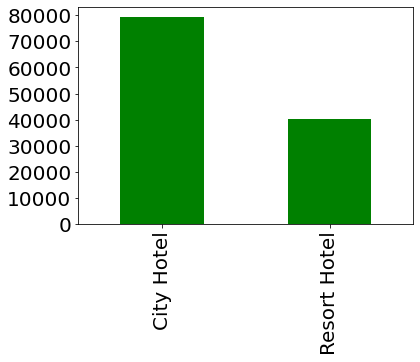

In [ ]:
df['hotel'].value_counts().plot(kind='bar',color='green',fontsize=20)

###2) Which year most of customers arrive? 


In [ ]:
most_customers=df['arrival_date_year'].value_counts()
l1=dict(most_customers)

In [ ]:
print("most customers arrived in year = ",max(l1, key = l1.get))
# def test(d):
  # return max(d, key = d.get)
# test(l1)

most customers arrived in year =  2016


In [ ]:
#mot2015=df['arrival_date_year'].value_counts()


In [ ]:
#mot=df.groupby('hotel')['arrival_date_year']


In [ ]:
#mot.value_counts()

In [ ]:

# mot.value_counts().plot(kind='bar',color='green',fontsize=20)

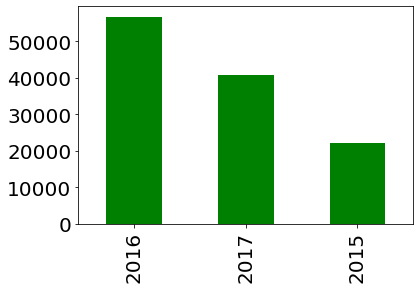

In [ ]:
most_customers.plot(kind='bar',color='green',fontsize=20)

###3) Which are the busiest months in the year of hotel booking?

In [ ]:
active_month=df['arrival_date_month'].value_counts()
monthly=dict(active_month)

In [ ]:
print("Busiest Months = ",max(monthly, key = monthly.get))

Busiest Months =  August


In [ ]:
active_month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

###4) How many booking were cancelled.
#py chart

In [ ]:
cancelled_booking1=df['is_canceled'].value_counts()[1]
print("How many booking were cancelled = ",cancelled_booking1)

How many booking were cancelled =  44224


In [ ]:
hote_can=df.groupby('hotel')['is_canceled'].value_counts()
hote_can

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64

###5) From which country most guests arrive.


In [ ]:
cust_country=df['country'].value_counts()

cust_country
print("Most guests arrived from = ",cust_country)

Most guests arrived from =  PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64


In [ ]:
cust_country1=df['country'].value_counts()
l3=dict(cust_country1)


In [ ]:
print("Most Guests from this country = ",max(l3, key = l3.get))
#print("Number of Guests from PRT is = ",l3('PRT'))

Most Guests from this country =  PRT


###6) How customers booked their hotel from market segment.

In [ ]:
market_seg=df['market_segment'].value_counts()

In [ ]:
segment=dict(market_seg)
segment


{'Online TA': 56477,
 'Offline TA/TO': 24219,
 'Groups': 19811,
 'Direct': 12606,
 'Corporate': 5295,
 'Complementary': 743,
 'Aviation': 237,
 'Undefined': 2}

### 7) How many customers were stays in week nights and booking changes?

In [ ]:
# stay_week_night=df['stays_in_week_nights','booking_changes'].value_counts()

In [ ]:
#stay_week_night

In [35]:
#df['country'].value_counts().plot(kind = 'bar')

###8) How many repeated customers?

In [ ]:
repeat_cust=df['is_repeated_guest'].value_counts()[1]
repeat_cust

3810

###9) Deposit type payment of customer?

In [ ]:
#df.info()
df['deposit_type'].value_counts()


No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

###10) Correlation of Data Set

In [32]:
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();

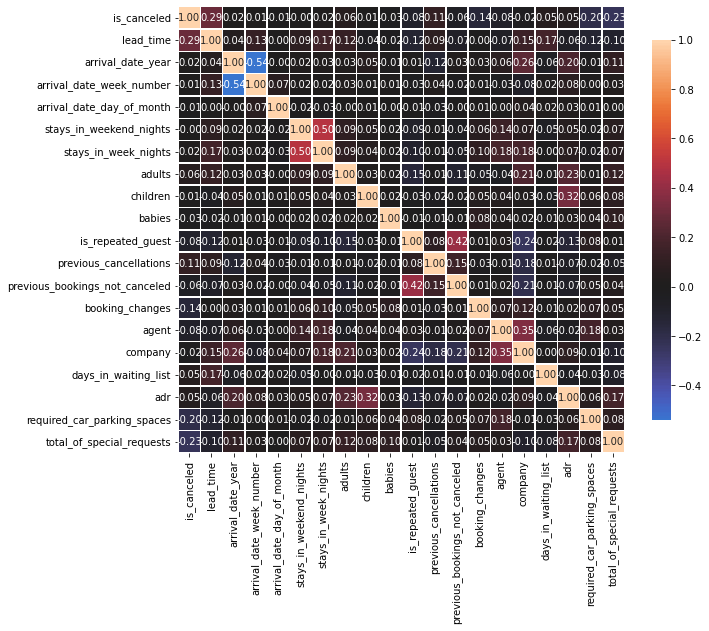

In [33]:
correlation_heatmap(df)